In [2]:
import pandas as pd
io = 'D:\ebm\MLDE PMA\default_data.csv'
rawdata = pd.read_csv(io)

In [3]:
rawdata.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,lump_sum_payment,property_value,Secured_by,total_units,income,Credit_Score,age,LTV,Region,Status
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,not_lpsm,118000.0,home,1U,1740.0,758,25-34,98.728814,south,1
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,lpsm,NaN,home,1U,4980.0,552,55-64,NaN,North,1
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,not_lpsm,508000.0,home,1U,9480.0,834,35-44,80.019685,south,0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,not_lpsm,658000.0,home,1U,11880.0,587,45-54,69.376900,North,0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,not_lpsm,758000.0,home,1U,10440.0,602,25-34,91.886544,North,0


In [4]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      148670 non-null  int64  
 1   year                    148670 non-null  int64  
 2   loan_limit              145326 non-null  object 
 3   Gender                  148670 non-null  object 
 4   approv_in_adv           147762 non-null  object 
 5   loan_type               148670 non-null  object 
 6   loan_purpose            148536 non-null  object 
 7   Credit_Worthiness       148670 non-null  object 
 8   open_credit             148670 non-null  object 
 9   business_or_commercial  148670 non-null  object 
 10  loan_amount             148670 non-null  int64  
 11  rate_of_interest        112231 non-null  float64
 12  Upfront_charges         109028 non-null  float64
 13  term                    148629 non-null  float64
 14  Neg_ammortization   

In [5]:
rawdata.isnull().sum()

ID                            0
year                          0
loan_limit                 3344
Gender                        0
approv_in_adv               908
loan_type                     0
loan_purpose                134
Credit_Worthiness             0
open_credit                   0
business_or_commercial        0
loan_amount                   0
rate_of_interest          36439
Upfront_charges           39642
term                         41
Neg_ammortization           121
interest_only                 0
lump_sum_payment              0
property_value            15098
Secured_by                    0
total_units                   0
income                     9150
Credit_Score                  0
age                         200
LTV                       15098
Region                        0
Status                        0
dtype: int64

In [6]:
Y = rawdata.groupby('year').count()

In [7]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_fill0 = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)
term = rawdata.loc[:,'term'].values.reshape(-1,1) #change series into a columns of data to meet imputer requirement
property_value = rawdata.loc[:,'property_value'].values.reshape(-1,1)
rawdata['term']=imp_fill0.fit_transform(term)
rawdata['property_value'] = imp_fill0.fit_transform(property_value)

In [8]:
imp_fillother = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value='other')
loan_limit = rawdata.loc[:,'loan_limit'].values.reshape(-1,1)
approv_in_adv = rawdata.loc[:,'approv_in_adv'].values.reshape(-1,1)
loan_purpose = rawdata.loc[:,'loan_purpose'].values.reshape(-1,1)
Neg_ammortization = rawdata.loc[:,'Neg_ammortization'].values.reshape(-1,1)
age = rawdata.loc[:,'age'].values.reshape(-1,1)
rawdata['loan_limit'] = imp_fillother.fit_transform(loan_limit)
rawdata['approv_in_adv'] = imp_fillother.fit_transform(approv_in_adv)
rawdata['loan_purpose'] = imp_fillother.fit_transform(loan_purpose)
rawdata['Neg_ammortization'] = imp_fillother.fit_transform(Neg_ammortization) #wait for get dummies
rawdata['age'] = imp_fillother.fit_transform(age)

In [9]:
rawdata.drop(['ID','year'], axis=1)

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,lump_sum_payment,property_value,Secured_by,total_units,income,Credit_Score,age,LTV,Region,Status
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,not_lpsm,118000.0,home,1U,1740.0,758,25-34,98.728814,south,1
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,lpsm,0.0,home,1U,4980.0,552,55-64,NaN,North,1
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,...,not_lpsm,508000.0,home,1U,9480.0,834,35-44,80.019685,south,0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,...,not_lpsm,658000.0,home,1U,11880.0,587,45-54,69.376900,North,0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,...,not_lpsm,758000.0,home,1U,10440.0,602,25-34,91.886544,North,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,...,not_lpsm,608000.0,home,1U,7860.0,659,55-64,71.792763,south,0
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,...,not_lpsm,788000.0,home,4U,7140.0,569,25-34,74.428934,south,0
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,...,not_lpsm,728000.0,home,1U,6900.0,702,45-54,61.332418,North,0
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,...,not_lpsm,278000.0,home,1U,7140.0,737,55-64,70.683453,North,0


In [11]:
middata = rawdata[['loan_type','Credit_Worthiness','open_credit','business_or_commercial','interest_only','lump_sum_payment','Secured_by']]

In [12]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(dtype=int)
newdata=enc.fit_transform(middata)

In [13]:
rawdata[['loan_type','Credit_Worthiness','open_credit','business_or_commercial','interest_only','lump_sum_payment','Secured_by']] = enc.fit_transform(middata)
#change text data into 1/0

In [14]:
rawdata.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,lump_sum_payment,property_value,Secured_by,total_units,income,Credit_Score,age,LTV,Region,Status
0,24890,2019,cf,Sex Not Available,nopre,0,p1,0,0,1,...,1,118000.0,0,1U,1740.0,758,25-34,98.728814,south,1
1,24891,2019,cf,Male,nopre,1,p1,0,0,0,...,0,0.0,0,1U,4980.0,552,55-64,NaN,North,1
2,24892,2019,cf,Male,pre,0,p1,0,0,1,...,1,508000.0,0,1U,9480.0,834,35-44,80.019685,south,0
3,24893,2019,cf,Male,nopre,0,p4,0,0,1,...,1,658000.0,0,1U,11880.0,587,45-54,69.376900,North,0
4,24894,2019,cf,Joint,pre,0,p1,0,0,1,...,1,758000.0,0,1U,10440.0,602,25-34,91.886544,North,0


In [15]:
rawdata[['status_interestrate','status_upcharge','status_income','status_ltv']]=0

In [16]:
rawdata.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,income,Credit_Score,age,LTV,Region,Status,status_interestrate,status_upcharge,status_income,status_ltv
0,24890,2019,cf,Sex Not Available,nopre,0,p1,0,0,1,...,1740.0,758,25-34,98.728814,south,1,0,0,0,0
1,24891,2019,cf,Male,nopre,1,p1,0,0,0,...,4980.0,552,55-64,NaN,North,1,0,0,0,0
2,24892,2019,cf,Male,pre,0,p1,0,0,1,...,9480.0,834,35-44,80.019685,south,0,0,0,0,0
3,24893,2019,cf,Male,nopre,0,p4,0,0,1,...,11880.0,587,45-54,69.376900,North,0,0,0,0,0
4,24894,2019,cf,Joint,pre,0,p1,0,0,1,...,10440.0,602,25-34,91.886544,North,0,0,0,0,0


In [17]:
#for i in range(len(rawdata)):
#    if pd.isnull(rawdata['rate_of_interest'][i]) == True:
#        rawdata['status_interestrate'][i]=1
#    if pd.isnull(rawdata['Upfront_charges'][i]) == True:
#        rawdata['status_upcharge'][i]=1
#    if pd.isnull(rawdata['income'][i]) == True:
#        rawdata['status_income'][i]=1
#    if pd.isnull(rawdata['LTV'][i]) == True:
#        rawdata['status_ltv'][i]=1               

In [18]:
rawdata.loc[pd.isnull(rawdata['rate_of_interest'])==True, 'status_interestrate'] = 1 
rawdata.loc[pd.isnull(rawdata['Upfront_charges'])==True, 'status_upcharge'] = 1 
rawdata.loc[pd.isnull(rawdata['income'])==True, 'status_income'] = 1 
rawdata.loc[pd.isnull(rawdata['LTV'])==True, 'status_ltv'] = 1  #set status to 1 if LTV is NaN

In [20]:
imp_fillmean = SimpleImputer(missing_values=np.nan, strategy='mean')
rate_of_interest = rawdata.loc[:,'rate_of_interest'].values.reshape(-1,1)
Upfront_charges = rawdata.loc[:,'Upfront_charges'].values.reshape(-1,1)
income = rawdata.loc[:,'income'].values.reshape(-1,1)
LTV = rawdata.loc[:,'LTV'].values.reshape(-1,1)
rawdata['rate_of_interest'] = imp_fillmean.fit_transform(rate_of_interest)
rawdata['Upfront_charges'] = imp_fillmean.fit_transform(Upfront_charges)
rawdata['income'] = imp_fillmean.fit_transform(income)
rawdata['LTV'] = imp_fillmean.fit_transform(LTV) #fill na with mean

In [19]:
rawdata.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,income,Credit_Score,age,LTV,Region,Status,status_interestrate,status_upcharge,status_income,status_ltv
0,24890,2019,cf,Sex Not Available,nopre,0,p1,0,0,1,...,1740.0,758,25-34,98.728814,south,1,1,1,0,0
1,24891,2019,cf,Male,nopre,1,p1,0,0,0,...,4980.0,552,55-64,NaN,North,1,1,1,0,1
2,24892,2019,cf,Male,pre,0,p1,0,0,1,...,9480.0,834,35-44,80.019685,south,0,0,0,0,0
3,24893,2019,cf,Male,nopre,0,p4,0,0,1,...,11880.0,587,45-54,69.376900,North,0,0,1,0,0
4,24894,2019,cf,Joint,pre,0,p1,0,0,1,...,10440.0,602,25-34,91.886544,North,0,0,0,0,0


In [21]:
rawdata.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,income,Credit_Score,age,LTV,Region,Status,status_interestrate,status_upcharge,status_income,status_ltv
0,24890,2019,cf,Sex Not Available,nopre,0,p1,0,0,1,...,1740.0,758,25-34,98.728814,south,1,1,1,0,0
1,24891,2019,cf,Male,nopre,1,p1,0,0,0,...,4980.0,552,55-64,72.746457,North,1,1,1,0,1
2,24892,2019,cf,Male,pre,0,p1,0,0,1,...,9480.0,834,35-44,80.019685,south,0,0,0,0,0
3,24893,2019,cf,Male,nopre,0,p4,0,0,1,...,11880.0,587,45-54,69.376900,North,0,0,1,0,0
4,24894,2019,cf,Joint,pre,0,p1,0,0,1,...,10440.0,602,25-34,91.886544,North,0,0,0,0,0


In [23]:
rawdata = pd.get_dummies(rawdata,columns = ['loan_limit','Gender','approv_in_adv','loan_purpose','Neg_ammortization','total_units','age','Region'],prefix = ['loan_limit','Gender','approv_in_adv','loan_purpose','Neg_ammortization','total_units','age','Region'])

In [26]:
target = rawdata['Status']

In [29]:
data = rawdata.drop(['Status'],axis=1)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [41]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import GridSearchCV
maxdep = []
minsample=[]
maxfeature = []
for i in range(15,55,10):
    minsample.append(i*30)
    maxdep.append(i*3)
    maxfeature.append(i)
tuned_parameters = [{'criterion': ['gini'],
                     'max_depth': maxdep,
                     'min_samples_split': minsample,
                     'max_features': [55]}]

scores = ['recall']

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    clf = GridSearchCV(DTC(), tuned_parameters, cv=3,
                       scoring= score)
    clf.fit(X_train,y_train)
    print("Best parameters set found on the training set:")
    print(clf.best_params_)
    print("\n")
#find optimal parameter for DTC

# Tuning hyperparameters for recall


Best parameters set found on the training set:
{'criterion': 'gini', 'max_depth': 45, 'max_features': 55, 'min_samples_split': 450}




In [42]:
# predict the test data, outcome is precision, acc, recall, f1
tree_model = DTC(criterion='gini', max_depth=45, max_features=55, min_samples_split=450)
tree_model_fit = tree_model.fit(X_train,y_train)
predicted = tree_model_fit.predict(X_test)
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score
print(precision_score(y_test,predicted))
print(accuracy_score(y_test,predicted))
print(recall_score(y_test,predicted))
print(f1_score(y_test,predicted))

1.0
1.0
1.0
1.0


In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
import numpy as np
%matplotlib inline

np.set_printoptions(precision=2)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalise=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          multi=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalise=True`.
    """
    if not title:
        if normalise:
            title = 'Normalised confusion matrix'
        else:
            title = 'Confusion matrix, without normalisation'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    if multi==True:
    	classes = classes[unique_labels(y_true, y_pred)]
    if normalise:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor");

    fmt = '.2f' if normalise else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

<AxesSubplot:title={'center':'Confusion matrix, without normalisation'}, xlabel='Predicted label', ylabel='True label'>

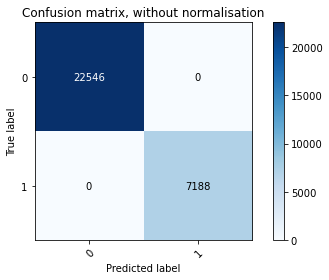

In [43]:
# Plot non-normalised confusion matrix
plot_confusion_matrix(y_test, predicted, classes=["0", "1"])